# Text-to-SQL Empowered by Large Language Models: A Benchmark Evaluation

* Damilola Agbolabori
* Obinna Onyema

####  Emails:
* dagbolabori@torontomu.ca
* obinna.onyema@torontomu.ca

# Introduction:

#### Problem Description:

Text-to-SQL (Structured Query Language) is a challenging task in both natural language processing (NLP) and database communities. It involves translating natural language questions into SQL queries that can be executed on a given relational database. This task is essential for enabling non-expert users to interact with databases effectively, as it allows them to pose questions in natural language rather than requiring knowledge of SQL syntax.

#### Context of the Problem:

Traditionally, Text-to-SQL systems relied on predefined rules or query enumeration techniques to handle this task. However, with the advent of deep learning and large language models (LLMs), such as GPT (Generative Pre-trained Transformer) models, there has been a shift towards more data-driven approaches. These models can learn complex patterns and mappings between natural language questions and SQL queries, making them well-suited for Text-to-SQL tasks.

The goal of this Text-to-SQL project is to test the DAIL-SQL method. This method  uses the supervised fine-tuning text-to-SQL and prompt engineering empowered by large language models (LLMs) for generating syntactically correct SQL queries.

#### Limitation About other Approaches:

Recent advancements in LLM-based Text-to-SQL have shown promising results, with models achieving high accuracy on benchmark datasets like Spider. However, there is still room for improvement, particularly in areas such as prompt engineering, example selection, and fine-tuning of LLMs for this specific task.

#### Solution:

In this project, we tested the GPT-4 model across two key methodologies from DAIL-SQL. This approach aims to evaluate the effectiveness of these methodologies with a consistent model, allowing for a direct comparison of their performance. The two methodologies are listed below

1. DAIL Selection (DAIL𝑆): This method selects examples based on questions and queries, aiming to enhance Text-to-SQL task execution accuracy.
2. DAIL Organization (DAIL𝑂): This method organizes examples to balance quality and quantity while preserving question-to-SQL mappings, further improving Text-to-SQL performance.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Yu et al. (2018) | They used a Seq2Seq model to create a tree based SQL decoder that can identify columns better as well as create nested queries| Spider dataset | Only 48% accuracy
| Wang et al. (2020) | They focused on the medical domain considering the unique structure and terminology of medical records. They introduced the Translate-Edit Model for Question-to-SQL (TREQS) generation task by first generating the targeted SQL directly then editing with both attentive-copying mechanism and a recover technique| MIMICSQL | High accuracy of 85% but small dataset of 10k records
| Dawei et al. (2023) | They focused on mplementing and refining two key methodologies from DAIL-SQL: DAIL Selection (DAIL𝑆) and DAIL Organization (DAIL𝑂). DAIL𝑆 emphasizes candidate example selection based on question and query similarity, while DAIL𝑂 focuses on efficient organization of examples while preserving question-SQL mapping. Our aim is to enhance Text-to-SQL systems by optimizing these methods for improved performance and accuracy.| Spider dataset | 86.2% 


The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

# Methodology

The study's methodology focuses on exclusively evaluating Text-to-SQL methods using the GPT-4 model, with the Spider datasets. Spider comprises extensive instances split into training and development sets, while Spider-Realistic offers a more challenging subset. 

In this project, our primary focus was on harnessing the capabilities of the GPT-4 model to enhance Text-to-SQL performance. We tested two key methodologies, DAIL Selection (DAIL𝑆) and DAIL Organization (DAIL𝑂), tailored specifically for GPT-4. DAIL𝑆 selects examples based on questions and queries, while DAIL𝑂 organizes examples to balance quality and quantity, preserving question-to-SQL mappings. Integrated into our approach, these methodologies aim to significantly elevate Text-to-SQL task execution accuracy.



![Alternate text ](text-to-sql.png "Title of the figure, location is simply the directory of the notebook")

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [2]:
# Generate questions for prediction

!python generate_question.py --data_type spider --split test --tokenizer gpt-3.5-turbo --max_seq_len 4096 --prompt_repr SQL --k_shot 9 --example_type QA --selector_type  EUCDISQUESTIONMASK


In [4]:
# Predict SQL queries from LLM

!python ask_llm.py --openai_api_key your_key  --model gpt-4 --question prompt

In [3]:
# Code cells

# Results

In our experiment, we use the DAIL technique which includes 9-shot prompts of SQL query examples as well as hints of the database schema.

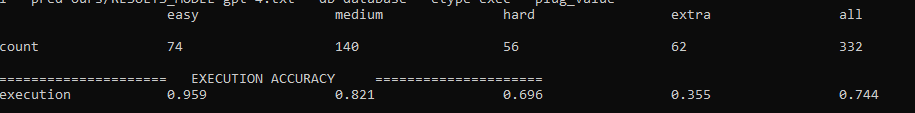

We achieve 95.9% on easier queries but 74.4% overall execution accuracy. Comparatively, the authors of the original paper achieved overall accuracy of 86.2%

Evaluation was done using the work of Zhong et all (available on their github repo https://github.com/taoyds/test-suite-sql-eval/tree/master)

# Conclusion and Future Direction

> Write what you have learnt in this project. In particular, write few sentences about the results and their limitations, how they can be extended in future. Make sure your own inference/learnings are depicted here.

LLMs require "coaching" when they are expected to generate SQL to query an unseen database. Prompt Engineering improves performance of LLMs. The best performance comes from
* providing sample queries to teach the LLM what is expected
* providing some level of awareness of the database schema



# References:

[1]:  Authors names, title of the paper, Conference Name,Year, page number (iff available)

[2]:  Author names, title of the paper, Journal Name,Journal Vol, Issue Num, Year, page number (iff available)